In [23]:
import numpy as np
import math
from matplotlib import pyplot as plt

### Configuration of Motor Allocation Matrix

$$ \begin{bmatrix}
T \\
T_{\phi} \\
T_{\theta} \\
T_{\psi}
\end{bmatrix} =
\begin{bmatrix}
k_{t} & k_{t} & k_{t} & k_{t} \\
temp & temp
\end{bmatrix}
\begin{bmatrix}
\omega^{2}_{0} \\
\omega^{2}_{1} \\
\omega^{2}_{2} \\
\omega^{2}_{3} \\
\end{bmatrix}
$$

xx

In [2]:
m = 1  # kg
g = 9.8  # m/s^2
Ix, Iy, Iz = 0.11, 0.11, 0.04  # kg m^2
l = 0.2  # m (this drops out when controlling via torques)

In [5]:
l = math.sqrt(0.13*0.13+0.2*0.2)
ang_rad = math.atan(0.2/0.13)
print("RAD",ang_rad)
print("DEG",ang_rad*180/math.pi)

RAD 0.9944211062037129
DEG 56.97613244420336


In [6]:
ylen = 0.13
xlen = 0.2
kt = 1.5e-6
km = 1.5e-6
preinv = np.array([[kt, kt, kt, kt],
                  [-ylen*kt, ylen*kt, -ylen*kt, ylen*kt],
                  [xlen*kt, -xlen*kt, -xlen*kt, xlen*kt],
                  [km, km, km, km]])

#np.linalg.inv(preinv)
np.linalg.pinv(preinv)

array([[   83333.33333333, -1282051.28205128,   833333.33333333,
           83333.33333333],
       [   83333.33333333,  1282051.28205128,  -833333.33333333,
           83333.33333333],
       [   83333.33333333, -1282051.28205128,  -833333.33333333,
           83333.33333333],
       [   83333.33333333,  1282051.28205128,   833333.33333333,
           83333.33333333]])

In [7]:
## According to gazebo sim, max RPM is 838 which is ~87.7 rad/s

## With a kt of 1.5e-6, that gives a max force of
F_max = kt*(87.7*87.7)
print(F_max*4)

0.04614774000000001


In [8]:
## In order to try and identify the maximum thrust generated with a max PWM signal (1900), we set all outputs to 1900PWM

zvel_delta = 1.75
sec_delta = 0.5
mass=2.23 ## including gimbal
#kt = 1.5e-6
kt = 5.6e-6

est_force = (0.25)*(mass*zvel_delta/sec_delta + mass*9.8)
print("Motor force est: ", est_force)

## This gives 189N of thrust for each motor at 1900PWM (which is proportional to motor_speed)

## 189 = kt*(wt^2)

print(math.sqrt(est_force/kt))

## So 1900PWM ~ 11224.97 (\omega)


Motor force est:  7.414750000000001
1150.679147286506


In [9]:
## Apparently in the **ardupilot_gazebo** plugin, the rotor velocity is set directly to the PWM
## so with a PWM of 1900 the force is as follows
kt=1.5e-6
PWM=1900
F = kt*PWM*PWM
print(F)

5.415


In [10]:
mass=2.23
kt_est = 0.25*(1/(PWM*PWM))*mass*(9.8+3.5)
print(kt_est)

2.0539473684210527e-06


In [11]:
## Recompute with updated kt estimate
ylen = 0.13
xlen = 0.2
km = 1e-7 ## NOTE Probably wrong
kt = kt_est
preinv = np.array([[kt, kt, kt, kt],
                  [-ylen*kt, ylen*kt, -ylen*kt, ylen*kt],
                  [xlen*kt, -xlen*kt, -xlen*kt, xlen*kt],
                  [km, km, km, km]])

#np.linalg.inv(preinv)
np.linalg.pinv(preinv)

array([[ 121429.01301414, -936283.44749421,  608584.24087124,
           5911.9826964 ],
       [ 121429.01301414,  936283.44749421, -608584.24087124,
           5911.9826964 ],
       [ 121429.01301414, -936283.44749421, -608584.24087124,
           5911.9826964 ],
       [ 121429.01301414,  936283.44749421,  608584.24087124,
           5911.9826964 ]])

$$k_{t}=\frac{1}{4\omega^{2}}m(a+g)$$
$$\omega=\sqrt{\frac{1}{4k_{t}}m(a+g)}$$
With kt=2.05e-6, for hover thrust (a=0), we need the following rotor speed

In [24]:
kt_final = 2.05e-6
hover_w = math.sqrt((1/(4*kt_final))*mass*9.8)
print(hover_w)

1632.5201227609762


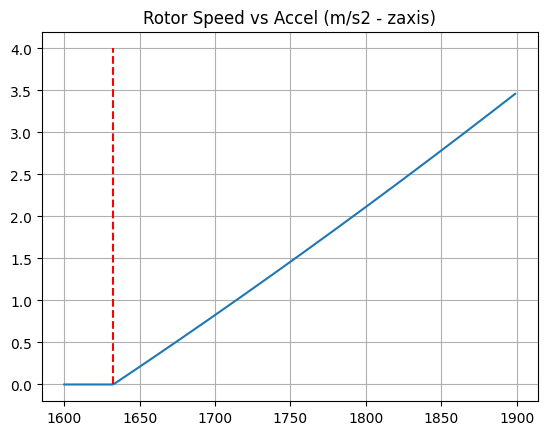

In [39]:
## Graph of rotor speed and acceleration

x = [i for i in range(1600,1900)]
y = [max(0,4*kt_final*i*i*(1/mass)-9.8) for i in range(1600,1900)]
plt.plot(x,y)
plt.grid(True)
plt.title('Rotor Speed vs Accel (m/s2 - zaxis)')
plt.vlines(hover_w,0,4, color='red', linestyle='--')
plt.show()